# 02. PyTorch Neural Network Classification

## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.




## What we're going to cover

In this notebook we're going to reiterate over the PyTorch workflow we covered in [01. PyTorch Workflow](https://www.learnpytorch.io/02_pytorch_classification/).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="a pytorch workflow flowchart" width=900/>

Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a **classification problem**.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |


## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make classification data and get it ready(准备数据)

In [63]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03, 
                   random_state=42)


In [64]:
print("first 5 samples of X:\n", X[:5])
print("first 5 samples of y:\n", y[:5])

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y:
 [1 1 1 1 0]


In [65]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


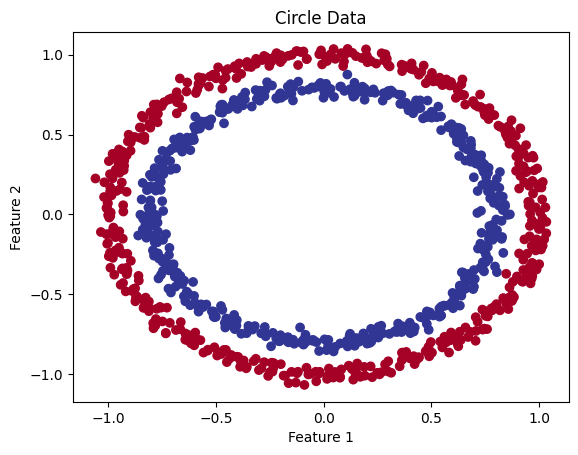

In [66]:
# visualize with a plotting library
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Circle Data")
plt.show()

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [67]:
X.shape, y.shape

((1000, 2), (1000,))

In [68]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [69]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Feature sample: {X_sample}, label sample: {y_sample}")
print(f"Shape of X sample: {X_sample.shape}, shape of y sample: {y_sample.shape}")

Feature sample: [0.75424625 0.23148074], label sample: 1
Shape of X sample: (2,), shape of y sample: ()


### 1.2 Turn data into tensors and create train and test splits

In [70]:
import torch
torch.__version__
print(f"Type of X: {type(X)}, Type of y: {type(y)}")
print(f"DType of X: {X.dtype}, Dtype of y: {y.dtype}")
# Convert data to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
print(f"Type of X: {type(X_tensor)}, Type of y: {type(y_tensor)}")
print(f"DType of X: {X_tensor.dtype}, Dtype of y: {y_tensor.dtype}")

Type of X: <class 'numpy.ndarray'>, Type of y: <class 'numpy.ndarray'>
DType of X: float64, Dtype of y: int64
Type of X: <class 'torch.Tensor'>, Type of y: <class 'torch.Tensor'>
DType of X: torch.float32, Dtype of y: torch.float32


In [71]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size=0.2, # 20%用于测试
                                                    random_state=42) # 设置随机种子以确保结果可重复,torch,manual_seed(42)只对torch有效，对sklearn无效
print(f"Length of X_train: {len(X_train)}, Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}, Length of y_test: {len(y_test)}")


Length of X_train: 800, Length of X_test: 200
Length of y_train: 800, Length of y_test: 200


## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
   
2. Construct a model (by subclassing `nn.Module`)
   
3. Define a loss function and optimizer
   
4. Create a training and test loop

In [72]:
from torch import nn
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
   
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
   
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
   
4. Instatiate an instance of our model class and send it to the target `device`

In [73]:
# 1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
        self.Layer_1 = nn.Linear(in_features=2, out_features=5) # 输入特征数为2，输出特征数为5,这个输出特征是任意的，可以调整
        self.Layer_2 = nn.Linear(in_features=5, out_features=1) # 输入特征数为5，输出特征数为1（二分类），该层的输入特征数必须与上一层的输出特征数相同

# 3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
    def forward(self, x):
        # Define the forward pass
        return self.Layer_2(self.Layer_1(x)) # 将数据依次传入两层中,x->Layer_1-->Layer_2-->output

# 4. Create an instance of the model class
model_0 = BinaryClassificationModel()
model_0.to(device)  # 将模型移动到指定设备（CPU或GPU）
model_0

BinaryClassificationModel(
  (Layer_1): Linear(in_features=2, out_features=5, bias=True)
  (Layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [74]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [75]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

# 对于简单的、直接逐层的模型，nn.Sequential()是一个很好的选择
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [76]:
model_0.state_dict()  # 查看模型的状态字典

OrderedDict([('0.weight',
              tensor([[-0.1155, -0.6499],
                      [ 0.5540, -0.2502],
                      [ 0.2478, -0.4161],
                      [ 0.0038, -0.5009],
                      [ 0.5691,  0.5964]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5567, -0.2475,  0.4401, -0.5908,  0.3244], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0552, -0.3706, -0.3589, -0.4185,  0.0838]], device='cuda:0')),
             ('1.bias', tensor([-0.1618], device='cuda:0'))])

In [77]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{(untrained_preds[:10])}")
print(f"\nFirst 10 predictions:\n{(torch.round(untrained_preds[:10]))}") # 对预测结果进行四舍五入，得到0或1的分类结果
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.4734],
        [ 0.5281],
        [ 0.0165],
        [ 0.6042],
        [-0.4814],
        [-0.4441],
        [ 0.1044],
        [-0.1245],
        [ 0.0382],
        [ 0.5262]], device='cuda:0')

First 10 predictions:
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [1.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
  
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a 
  
* For a defintion on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723 
  
* For different optimizers see `torch.optim`

In [78]:
# Setup the loss function

# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
#     nn.sigmoid(),
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in 内置了sigmoid激活函数

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [79]:
# Calculate the metrics ----accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model 

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
   
2. Calculate the loss
   
3. Optimizer zero grad
   
4. Loss backward (backpropagation)
   
5. Optimizer step (gradient descent) 

### 3.1 原始logits->预测概率->预测标签

我们的模型输出将是原始的**logits**。

我们可以将这些**logits**传递给某种激活函数（例如，二分类使用sigmoid函数，多分类使用softmax函数），从而将其转换为**预测概率**。

然后，我们可以通过四舍五入或取`argmax()`函数将模型的预测概率转换为**预测标签**。

In [80]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval() 
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits,y_test[:5]

(tensor([[ 0.4734],
         [ 0.5281],
         [ 0.0165],
         [ 0.6042],
         [-0.4814]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [81]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs,torch.round(y_pred_probs)

(tensor([[0.6162],
         [0.6290],
         [0.5041],
         [0.6466],
         [0.3819]], device='cuda:0'),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]], device='cuda:0'))

For our prediction probability values, we need to perform a range-style rounding on them:(对于我们的预测概率值，我们需要对其进行范围式舍入)
* `y_pred_probs` >= 0.5, `y=1` (class 1)
  
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [82]:
# Find the predicted labels 
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0')

In [83]:
### 3.2 Building a training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42) 

# Set the number of epochs
epochs = 100

# Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, 
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step() 

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass 
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  
  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70874, Acc: 50.75% | Test loss: 0.71820, Test acc: 49.50%
Epoch: 10 | Loss: 0.70490, Acc: 50.75% | Test loss: 0.71313, Test acc: 49.50%
Epoch: 20 | Loss: 0.70222, Acc: 50.50% | Test loss: 0.70943, Test acc: 50.50%
Epoch: 30 | Loss: 0.70028, Acc: 50.38% | Test loss: 0.70667, Test acc: 50.50%
Epoch: 40 | Loss: 0.69885, Acc: 50.50% | Test loss: 0.70454, Test acc: 51.00%
Epoch: 50 | Loss: 0.69776, Acc: 50.38% | Test loss: 0.70288, Test acc: 51.50%
Epoch: 60 | Loss: 0.69692, Acc: 50.25% | Test loss: 0.70155, Test acc: 51.00%
Epoch: 70 | Loss: 0.69627, Acc: 50.25% | Test loss: 0.70048, Test acc: 50.50%
Epoch: 80 | Loss: 0.69574, Acc: 50.00% | Test loss: 0.69961, Test acc: 50.50%
Epoch: 90 | Loss: 0.69532, Acc: 50.25% | Test loss: 0.69889, Test acc: 50.50%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything... 

So to inspect it let's make some predictions and make them visual! 

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [84]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


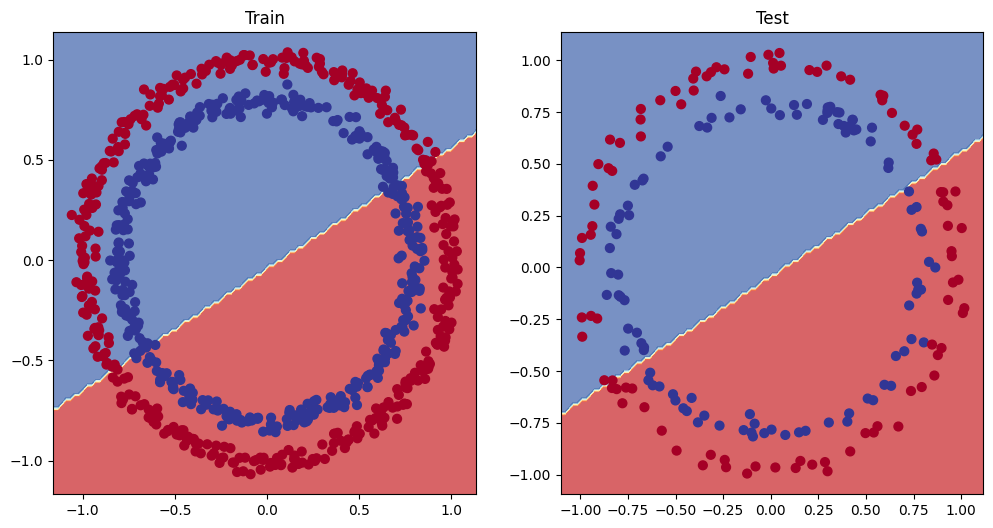

In [85]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

### 从图中可以看出，模型拟合效果不好，数据是圆形数据，而模型效果是线性的，所以需要改进

### 5. 提升模型性能（从模型角度）

* 添加更多的层 -- 给模型更多的机会去学习数据间的模式

* 添加隐藏的单元 -- 增加参数量（同上）

* 拟合更长时间

* 更换激活函数

* 更改学习率

* 更改损失函数

这些选项都是我们（作为机器学习工程师和数据科学家）可以更改的值，所以它们被称为**超参数**。

那些模型自行更新的，叫做**参数**。

In [91]:
# 修改一些超参数
"""
1. 增加隐藏层的神经元数量 5->10
2. 添加更多的隐藏层 2->3
3. 延长训练时间 100->1000
"""
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)  # 增加隐藏层的神经元数量
        self.layer_2 = nn.Linear(in_features=10, out_features=10)  # 增加隐藏层的神经元数量
        self.layer_3 = nn.Linear(in_features=10, out_features=1)   # 输出层

    def forward(self, x):
        # x = self.layer_1(x)
        # x = self.layer_2(x)
        # x = self.layer_3(x)
        return self.layer_3(self.layer_2(self.layer_1(x))) # 这种写法更简洁并且高效

# 创建模型实例
model_1 = CircleModel().to(device)
# model_1.state_dict()

In [92]:
# 创建损失函数和优化器

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [88]:
# 创建训练循环

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 定义训练轮数
epochs = 1000

# 把数据放入GPU
X_train,y_train,X_test,y_test = X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)

# 构建训练循环
for epoch in range(epochs):
    # 训练模式
    model_1.train()

    # 前向传播
    y_logits = model_1(X_train).squeeze() # squeeze()去掉多余的维度，防止维度不匹配
    y_pred = torch.round(torch.sigmoid(y_logits)) # 将logits转换为预测标签，sigmod函数将logits转换为概率，再通过round函数将概率转换为0或1的标签

    # 计算损失和准确率
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    # 优化器清零
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 优化器更新参数
    optimizer.step()

    # 测试模式
    model_1.eval()
    with torch.inference_mode():
        # 前向传播
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 计算测试损失和准确率
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
    # 每10个epoch打印一次结果
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}| Acc: {acc:.2f}% | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Test Loss: 0.69261| Acc: 50.88% | Test Acc: 51.00%
Epoch: 10 | Loss: 0.69369 | Test Loss: 0.69270| Acc: 50.25% | Test Acc: 50.00%
Epoch: 20 | Loss: 0.69351 | Test Loss: 0.69283| Acc: 50.12% | Test Acc: 49.50%
Epoch: 30 | Loss: 0.69339 | Test Loss: 0.69297| Acc: 50.50% | Test Acc: 48.00%
Epoch: 40 | Loss: 0.69329 | Test Loss: 0.69310| Acc: 50.38% | Test Acc: 49.00%
Epoch: 50 | Loss: 0.69322 | Test Loss: 0.69324| Acc: 49.88% | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69317 | Test Loss: 0.69336| Acc: 49.38% | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69312 | Test Loss: 0.69348| Acc: 49.38% | Test Acc: 50.50%
Epoch: 80 | Loss: 0.69309 | Test Loss: 0.69359| Acc: 50.12% | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69307 | Test Loss: 0.69370| Acc: 50.50% | Test Acc: 48.50%
Epoch: 100 | Loss: 0.69305 | Test Loss: 0.69379| Acc: 50.38% | Test Acc: 48.00%
Epoch: 110 | Loss: 0.69303 | Test Loss: 0.69388| Acc: 50.88% | Test Acc: 46.50%
Epoch: 120 | Loss: 0.69302 | Test Loss: 0.69396| Ac

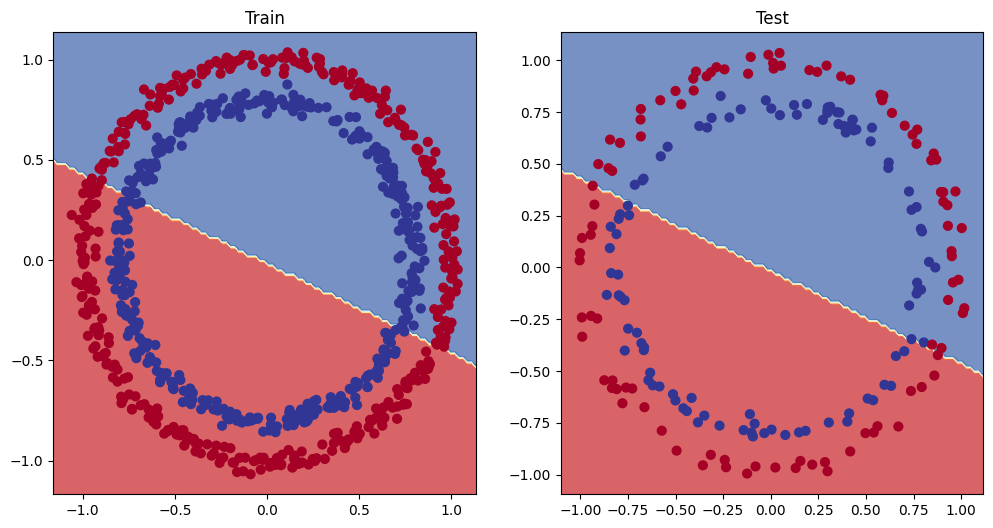

In [89]:
# 可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

### 看起来拟合的还是线性特征，那我们怎么确定他是否真的具备学习的能力呢，这里我们可以用线性拟合来测试一下

In [112]:
# 准备数据（线性）
weight = 0.7
bias = 0.3

X_train = torch.arange(0, 1, 0.001).unsqueeze(dim=1).float()
y_train = weight * X_train + bias

# 划分训练集和测试集
train_split = int(0.8 * len(X_train))
X_train, X_test = X_train[:train_split], X_train[train_split:]
y_train, y_test = y_train[:train_split], y_train[train_split:]
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0010],
         [0.0020],
         [0.0030],
         [0.0040]]),
 tensor([[0.3000],
         [0.3007],
         [0.3014],
         [0.3021],
         [0.3028]]))

In [ ]:
# 重新定义模型
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

# 随机种子保证可复现
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 创建损失函数和优化器
# loss_fn = nn.BCEWithLogitsLoss()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)
# 重新训练模型
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 设置训练轮数
epochs = 1000

# 把数据转移到GPU上
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# 训练循环
for epoch in range(epochs):
    # 训练模式
    model_2.train()

    # 前向传播
    y_pred = model_2.forward(X_train)

    # 计算损失
    loss = loss_fn(y_pred, y_train)

    # 优化器梯度清零
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 测试模式
    model_2.eval()
    with torch.inference_mode():
        # 评估模型
        test_pred = model_2.forward(X_test)
        test_loss = loss_fn(test_pred, y_test)
    # 每100轮打印一次损失
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.76161 | Test loss: 0.91260
Epoch: 10 | Train loss: 0.40313 | Test loss: 0.50442
Epoch: 20 | Train loss: 0.05930 | Test loss: 0.09864
Epoch: 30 | Train loss: 0.01491 | Test loss: 0.03117
Epoch: 40 | Train loss: 0.01087 | Test loss: 0.03051
Epoch: 50 | Train loss: 0.01201 | Test loss: 0.02820
Epoch: 60 | Train loss: 0.01315 | Test loss: 0.02591
Epoch: 70 | Train loss: 0.01428 | Test loss: 0.02363
Epoch: 80 | Train loss: 0.01540 | Test loss: 0.02136
Epoch: 90 | Train loss: 0.01652 | Test loss: 0.01910
Epoch: 100 | Train loss: 0.01763 | Test loss: 0.01685
Epoch: 110 | Train loss: 0.01874 | Test loss: 0.01461
Epoch: 120 | Train loss: 0.01983 | Test loss: 0.01238
Epoch: 130 | Train loss: 0.02093 | Test loss: 0.01016
Epoch: 140 | Train loss: 0.02201 | Test loss: 0.00796
Epoch: 150 | Train loss: 0.02309 | Test loss: 0.00576
Epoch: 160 | Train loss: 0.02417 | Test loss: 0.00358
Epoch: 170 | Train loss: 0.02524 | Test loss: 0.00147
Epoch: 180 | Train loss: 0.02630 | Test

/tmp/ipykernel_2294506/581509532.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


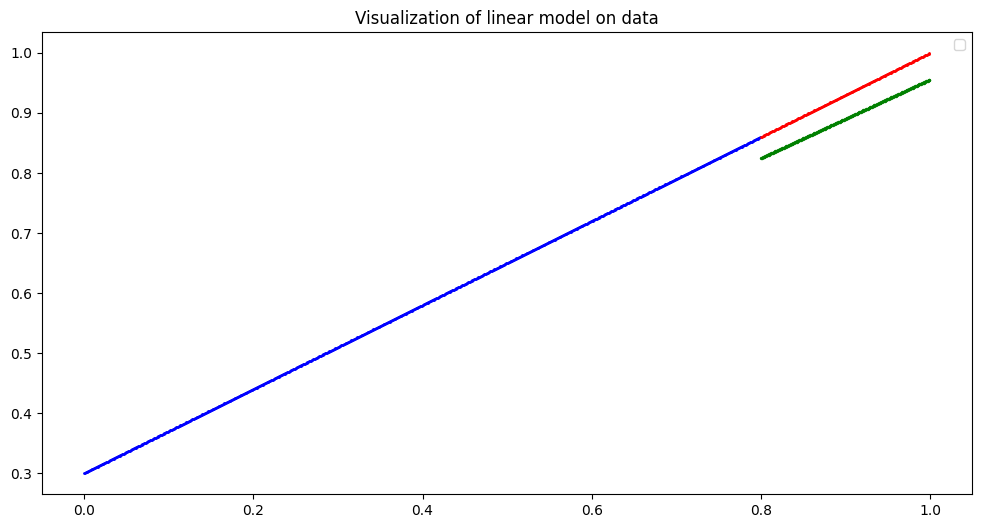

In [117]:
# 可视化
with torch.inference_mode():
    plt.figure(figsize=(12, 6))
    plt.title("Visualization of linear model on data")
    plt.scatter(X_train.cpu(), y_train.cpu(), c='blue', s=1)
    plt.scatter(X_test.cpu(), y_test.cpu(), c='red', s=1)
    plt.scatter(X_test.cpu(), model_2(X_test).cpu(), c='green', s=2)
    plt.legend()
    plt.show()

### 6. 模型中缺少的部分：非线性部分

如果你能被给予无限数量的直线和非直线，你能画出什么图案

或者用机器学习的术语来说，就是无穷多个（但实际上是有限的）线性函数和非线性函数？

#### 6.1 重新创建数据（非线性）

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

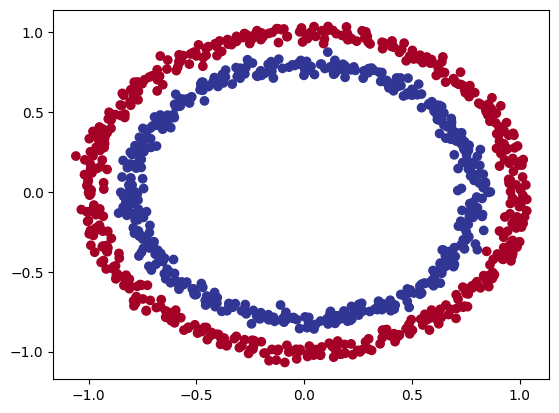

In [157]:
# 创建并可视化数据

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

# 将X，y转换成张量
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
# # 等同于
# train_split = int (0.8 *len(X))
# X_train = X[:train_split]
# y_train = y[:train_split]
# X_test = X[train_split:]
# y_test = y[train_split:]
X[:5],y[:5]

#### 6.2 搭建一个非线性模型

* 线性 = 直线

* 非线性 = 非直线

人工神经网络是线性（直线）函数和非直线（非线性）函数的大型组合，能够发现数据中的模式。

In [183]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # 添加ReLU激活函数(非线性激活函数)

    def forward(self, x):
        #我们该如何在隐藏层之间添加非线性激活函数呢？
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))  # 在隐藏层之间添加ReLU激活函数

# 实例化
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

**Note**: 逐元素激活，小于0的置0，大于0的保持原样

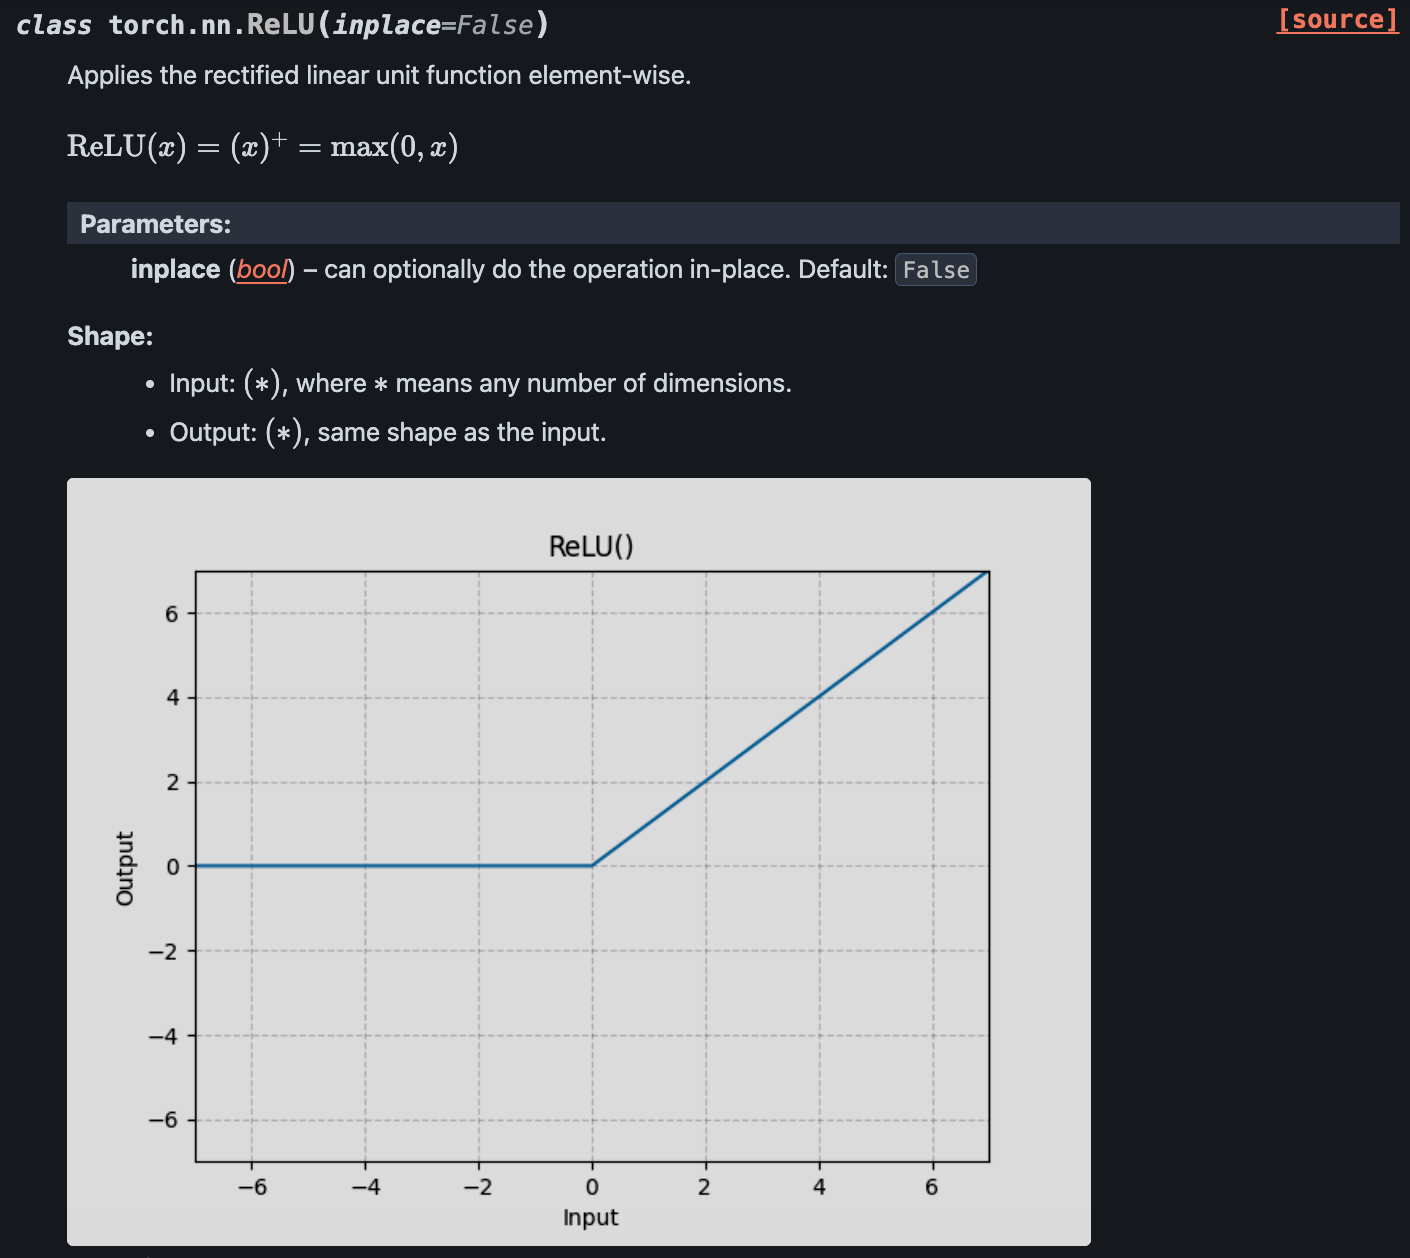

In [184]:
# 设置损失函数和优化器

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

#### 6.3 训练非线性模型

In [185]:
# 随机种子保证可复现
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 设置训练轮数
epochs = 2000

# 把数据转移到GPU上
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# 训练循环
for epoch in range(epochs):
    # 训练模式
    model_3.train()

    # 前向传播
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 计算损失
    loss = loss_fn(y_logits, y_train)
    acc =accuracy_fn(y_true=y_train, y_pred=y_pred)
    # 优化器梯度清零
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 测试模式
    model_3.eval()
    with torch.inference_mode():
        # 前向传播

        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 评估模型
        test_acc = accuracy_fn(y_test, test_pred)
        test_loss = loss_fn(test_logits, y_test)
    # 每100轮打印一次损失
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Train accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Train loss: 0.69295 | Train accuracy: 50.00 | Test loss: 0.69319 | Test accuracy: 50.00
Epoch: 100 | Train loss: 0.69115 | Train accuracy: 52.88 | Test loss: 0.69102 | Test accuracy: 52.50
Epoch: 200 | Train loss: 0.68977 | Train accuracy: 53.37 | Test loss: 0.68940 | Test accuracy: 55.00
Epoch: 300 | Train loss: 0.68795 | Train accuracy: 53.00 | Test loss: 0.68723 | Test accuracy: 56.00
Epoch: 400 | Train loss: 0.68517 | Train accuracy: 52.75 | Test loss: 0.68411 | Test accuracy: 56.50
Epoch: 500 | Train loss: 0.68102 | Train accuracy: 52.75 | Test loss: 0.67941 | Test accuracy: 56.50
Epoch: 600 | Train loss: 0.67515 | Train accuracy: 54.50 | Test loss: 0.67285 | Test accuracy: 56.00
Epoch: 700 | Train loss: 0.66659 | Train accuracy: 58.38 | Test loss: 0.66322 | Test accuracy: 59.00
Epoch: 800 | Train loss: 0.65160 | Train accuracy: 64.00 | Test loss: 0.64757 | Test accuracy: 67.50
Epoch: 900 | Train loss: 0.62362 | Train accuracy: 74.00 | Test loss: 0.62145 | Test accuracy

#### 6.4 测试该模型

In [186]:
model_3.eval()
with torch.inference_mode():
#   y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
    y_logits = model_3(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

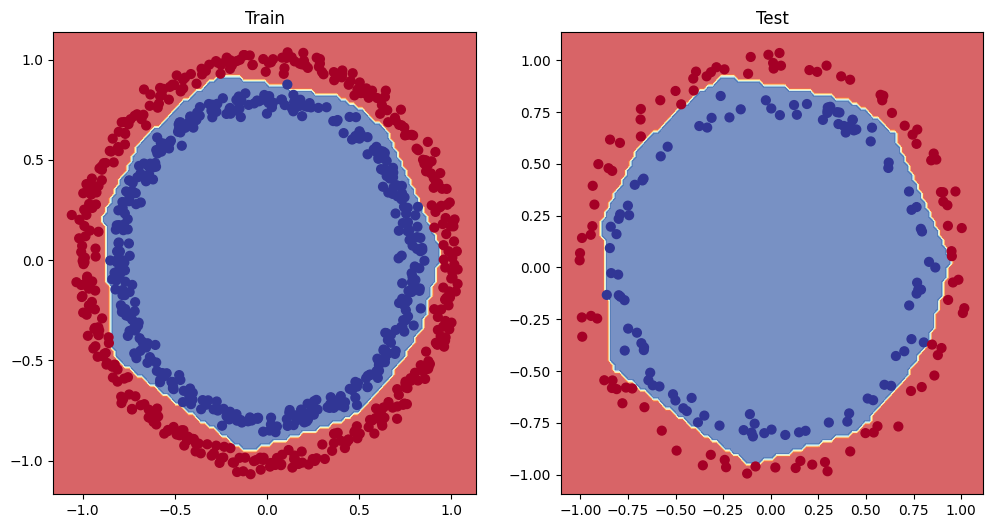

In [188]:
# visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

#### 7. 复现非线性激活函数

* 神经网络的运作方式并非由我们直接告诉模型要学习什么，而是提供工具让它自行发现数据中的模式。

* 而这些工具就是线性函数和非线性函数。

A的类型是: torch.float32,
值为: tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


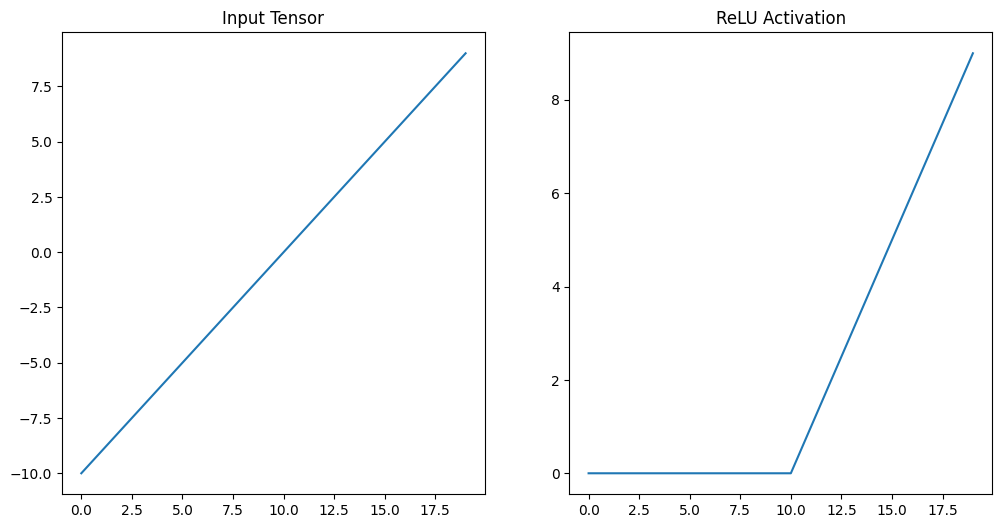

In [197]:
# 创建实验张量
A = torch.arange(-10,10,1,dtype=torch.float32)
print(f"A的类型是: {A.dtype},\n值为: {A}")

# 可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Input Tensor")
plt.plot(A)
plt.subplot(1, 2, 2)
plt.title("ReLU Activation")
plt.plot(torch.relu(A))

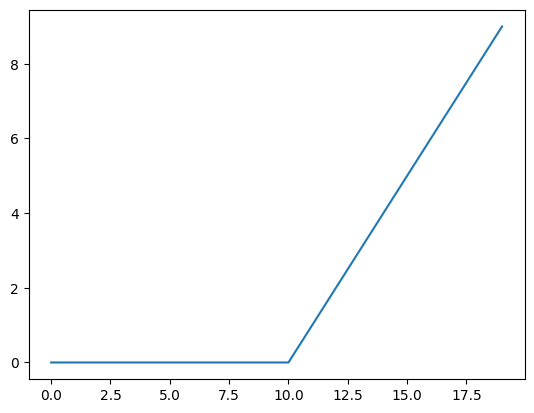

In [198]:
# 自己写relu函数

def relu_hand(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(x, torch.tensor(0.0))  # 返回x和0的逐元素最大值

A_relu = relu_hand(A)

plt.plot(A_relu)

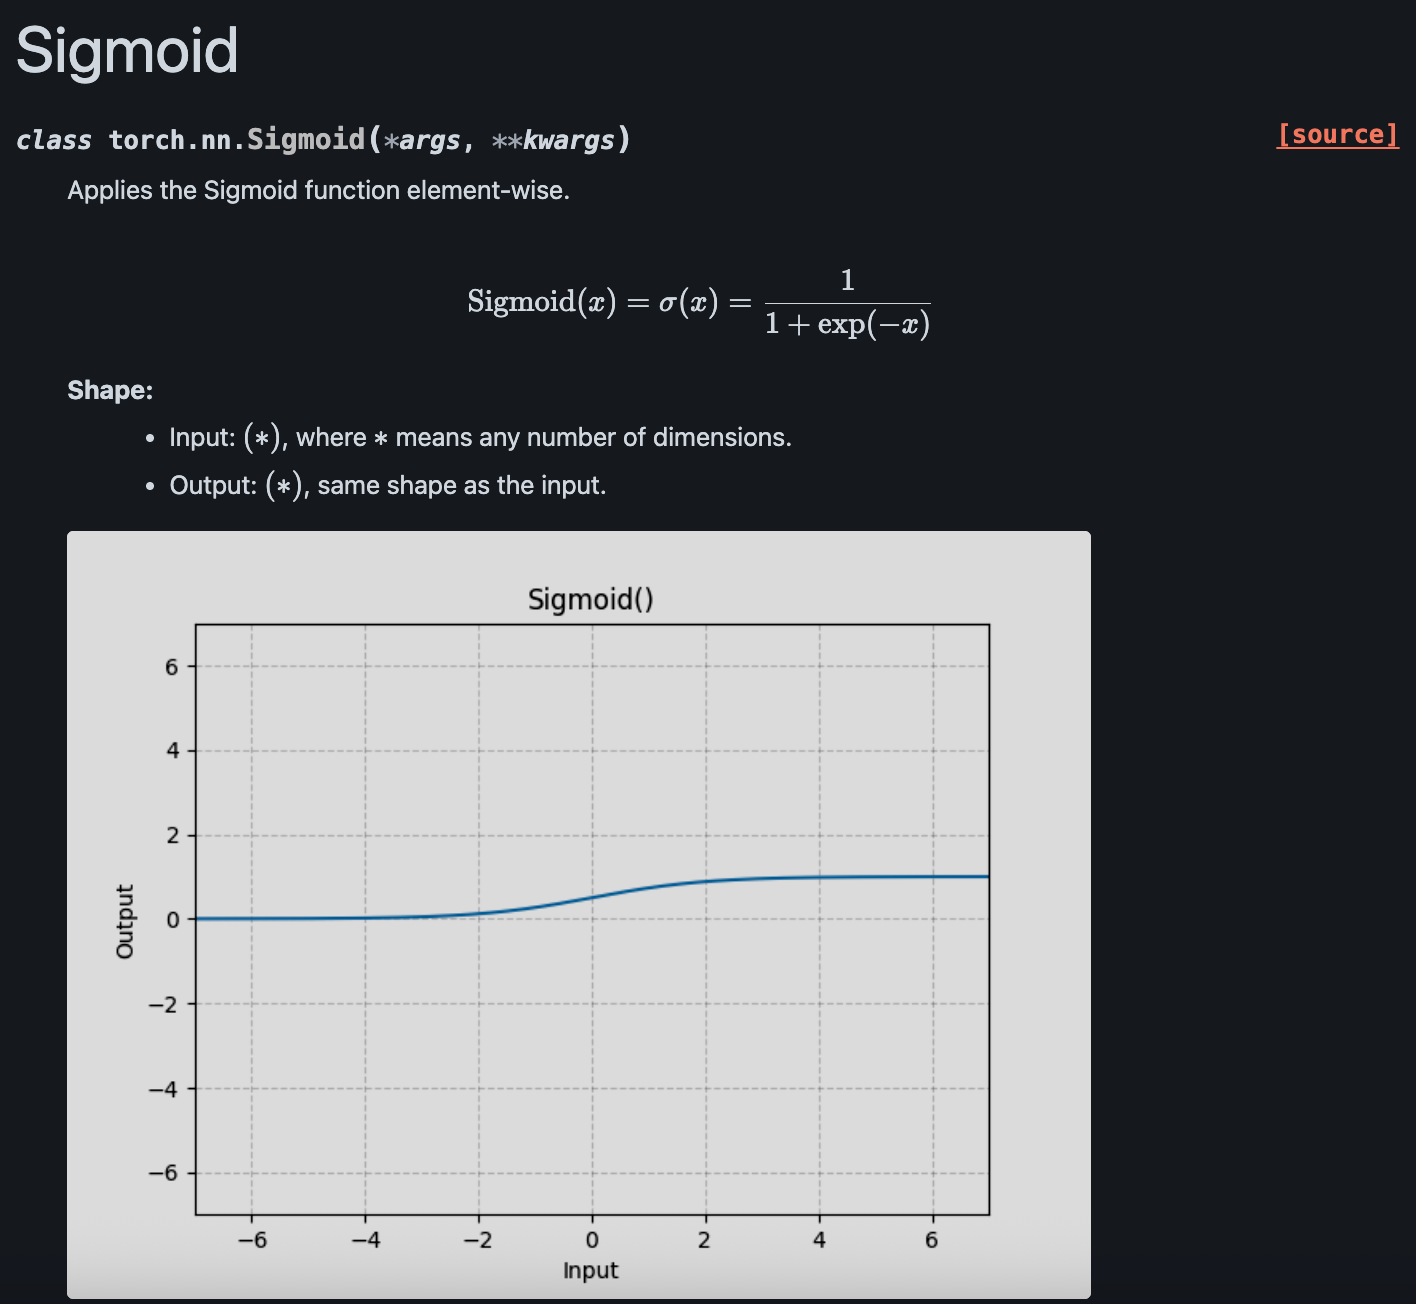

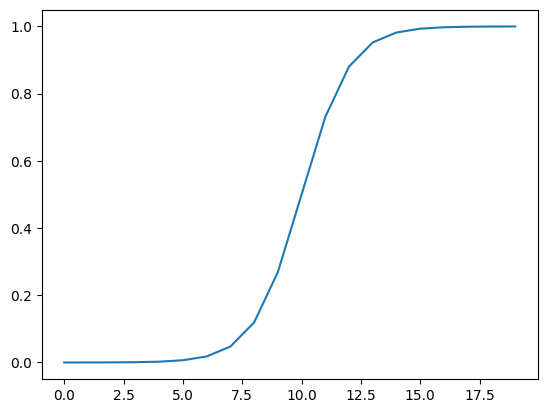

In [199]:
# 手写sigmoid函数

def sigmoid_hand(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

A_sigmoid = sigmoid_hand(A)

plt.plot(A_sigmoid)

## 8. 将所有内容整合到一个多分类问题中

* 二元分类 = 非此即彼（猫 vs 狗，垃圾邮件 vs 非垃圾邮件，欺诈 vs 非欺诈）

* 多分类 = 多个事物（猫 vs 狗 vs 鸡）

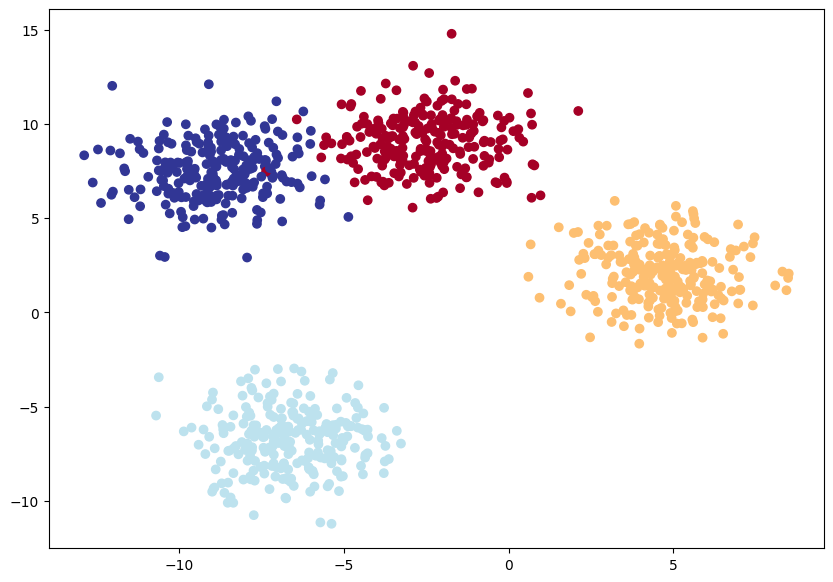

In [240]:
# 导入包
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs 
from sklearn.model_selection import train_test_split

# 创建超参数
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 创建数据
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # 每个簇的标准差（簇的“松散程度”）；数值越大，簇越分散、类间更容易重叠；越小则越紧密、类间更分离
                            random_state=RANDOM_SEED)
# 转换成张量
X_blob = torch.from_numpy(X_blob).float()
y_blob = torch.from_numpy(y_blob).long()  # 多分类问题，标签需要是long类型

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)
# 可视化数据
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

#### 8.2 搭建多分类模型

In [241]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [242]:
# 构建模型
class MultiClassmodelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 10):
        """Initializes multi-class classification model.
        
        Args:
        input_features (int): Number of input features to the model
        output_features (int): Number of outputs features (number of output classes)
        hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.layer_1 = nn.Linear(in_features=input_features, out_features=hidden_units)
        # 思考：是否需要考虑非线性激活函数？
        # nn.ReLU(),
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        # nn.ReLU(),
        self.layer_3 = nn.Linear(in_features=hidden_units, out_features=output_features)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
# 实例化模型
model_4 = MultiClassmodelV0(input_features=NUM_FEATURES,
                            output_features=NUM_CLASSES,
                            hidden_units=10).to(device)
model_4


MultiClassmodelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=4, bias=True)
)

In [243]:
# 查看有几类

torch.unique(y_train)

tensor([0, 1, 2, 3])

#### 8.3 创建损失函数和优化器

In [244]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 获取多分类 PyTorch 模型的预测概率

为了评估、训练和测试我们的模型，我们需要将模型的输出（logits）转换为预测概率，然后再转换为预测标签。

logits（模型的原始输出）-> 预测概率（使用 `torch.softmax`）-> 预测标签（取预测概率的 argmax）

In [245]:
# 看看未训练模型的输出
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test.to(device))

y_logits[:10]

tensor([[-0.4636,  0.5324,  0.1829, -0.2480],
        [ 0.8062,  3.0983,  0.5159, -0.8397],
        [ 0.6574, -1.0975, -0.5037,  0.2106],
        [-0.3592, -0.2018, -0.0276, -0.0586],
        [ 0.0107,  2.7798,  0.6318, -0.7937],
        [ 0.9816,  3.6292,  0.6063, -0.9659],
        [ 0.4725, -1.5773, -0.5789,  0.3235],
        [ 0.2170,  2.7868,  0.5827, -0.7866],
        [ 0.9520, -0.5615, -0.4414,  0.0882],
        [ 0.1390,  2.7330,  0.5884, -0.7764]], device='cuda:0')

In [246]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [247]:
# 将我们模型的logit输出转换为预测概率
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.4636,  0.5324,  0.1829, -0.2480],
        [ 0.8062,  3.0983,  0.5159, -0.8397],
        [ 0.6574, -1.0975, -0.5037,  0.2106],
        [-0.3592, -0.2018, -0.0276, -0.0586],
        [ 0.0107,  2.7798,  0.6318, -0.7937]], device='cuda:0')
tensor([[0.1458, 0.3949, 0.2784, 0.1809],
        [0.0845, 0.8360, 0.0632, 0.0163],
        [0.4704, 0.0814, 0.1473, 0.3009],
        [0.2035, 0.2382, 0.2835, 0.2748],
        [0.0519, 0.8282, 0.0967, 0.0232]], device='cuda:0')


In [248]:
# 将模型的预测概率转换为预测标签
y_preds = torch.argmax(y_pred_probs, dim=1)
print(f"y_preds: \n{y_preds}, \ny_test: \n{y_test}")

y_preds: 
tensor([1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 3, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 3, 1, 0, 1, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 3, 1, 1, 1,
        3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 3, 3, 1, 0, 0, 1, 1, 1, 3, 0,
        0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        3, 1, 0, 1, 1, 2, 0, 1], device='cuda:0'), 
y_test: 
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3,

#### 8.5 创建训练和测试循环

In [249]:
A = model_4(X_train.to(device))
A = torch.softmax(A, dim=1)
A

tensor([[0.1623, 0.3140, 0.2949, 0.2288],
        [0.0555, 0.8465, 0.0795, 0.0185],
        [0.5292, 0.0748, 0.1256, 0.2705],
        ...,
        [0.0538, 0.8414, 0.0849, 0.0199],
        [0.4764, 0.1038, 0.1500, 0.2698],
        [0.1373, 0.7562, 0.0796, 0.0269]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [250]:
# 随机种子保证可复现
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# 把数据转移到GPU上
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# 设置训练轮数
epochs = 1000

# 训练循环
for epoch in range(epochs):
    # 训练模式
    model_4.train()

    # 前向传播
    y_logits = model_4(X_train)
    y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

    # 计算损失
    loss = loss_fn(y_logits, y_train)
    acc =accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 优化器梯度清零
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 测试模式
    model_4.eval()
    with torch.inference_mode():
        # 前向传播
        test_logits = model_4(X_test)
        test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

        # 评估模型
        test_acc = accuracy_fn(y_test, test_pred)
        test_loss = loss_fn(test_logits, y_test)

    # 每100轮打印一次损失
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Train accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Train loss: 2.60789 | Train accuracy: 9.12 | Test loss: 0.65702 | Test accuracy: 85.50%
Epoch: 100 | Train loss: 0.03347 | Train accuracy: 99.12 | Test loss: 0.02468 | Test accuracy: 99.50%
Epoch: 200 | Train loss: 0.02839 | Train accuracy: 99.12 | Test loss: 0.01857 | Test accuracy: 99.50%
Epoch: 300 | Train loss: 0.02690 | Train accuracy: 99.12 | Test loss: 0.01653 | Test accuracy: 99.50%
Epoch: 400 | Train loss: 0.02615 | Train accuracy: 99.12 | Test loss: 0.01545 | Test accuracy: 99.50%
Epoch: 500 | Train loss: 0.02565 | Train accuracy: 99.12 | Test loss: 0.01474 | Test accuracy: 99.50%
Epoch: 600 | Train loss: 0.02525 | Train accuracy: 99.12 | Test loss: 0.01421 | Test accuracy: 99.50%
Epoch: 700 | Train loss: 0.02492 | Train accuracy: 99.12 | Test loss: 0.01379 | Test accuracy: 99.50%
Epoch: 800 | Train loss: 0.02463 | Train accuracy: 99.12 | Test loss: 0.01343 | Test accuracy: 99.50%
Epoch: 900 | Train loss: 0.02436 | Train accuracy: 99.25 | Test loss: 0.01311 | Test 

#### 8.6 测试效果

In [252]:
# 预测
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)
  
y_logits[:10]

tensor([[  8.6177,  20.3073, -18.4678, -11.2684],
        [ 10.6803, -19.9979,   6.7119,  18.8094],
        [-14.2201, -25.8715,  26.3597,  12.4107],
        [  2.8042,  14.4241, -10.9155,  -9.4941],
        [ 17.5478,   8.7577, -16.5397,   0.9183],
        [ 12.0824, -25.0856,   9.1664,  23.0946],
        [-15.1926, -20.2909,  23.3089,   7.9522],
        [ 15.2887,   1.0959, -10.0723,   5.5017],
        [-14.1171, -35.3830,  32.5451,  19.3445],
        [ 15.8189,   3.8534, -12.2206,   3.7311]], device='cuda:0')

In [253]:
# 将logit转换为预测概率
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[8.3798e-06, 9.9999e-01, 1.4460e-17, 1.9357e-14],
        [2.9476e-04, 1.3999e-17, 5.5718e-06, 9.9970e-01],
        [2.3791e-18, 2.0715e-23, 1.0000e+00, 8.7497e-07],
        [8.9852e-06, 9.9999e-01, 9.8891e-12, 4.0971e-11],
        [9.9985e-01, 1.5220e-04, 1.5700e-15, 5.9956e-08],
        [1.6500e-05, 1.1902e-21, 8.9345e-07, 9.9998e-01],
        [1.9011e-17, 1.1611e-19, 1.0000e+00, 2.1413e-07],
        [9.9994e-01, 6.8561e-07, 9.6788e-12, 5.6170e-05],
        [5.4308e-21, 3.1564e-30, 1.0000e+00, 1.8493e-06],
        [9.9999e-01, 6.3596e-06, 6.6465e-13, 5.6274e-06]], device='cuda:0')

In [254]:
# 将预测概率转换成标签值
y_preds = torch.argmax(y_pred_probs, dim=1)
print(f"预测值:{y_preds[:10]}")
print(f"真实值:{y_test[:10]}")

预测值:tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
真实值:tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')


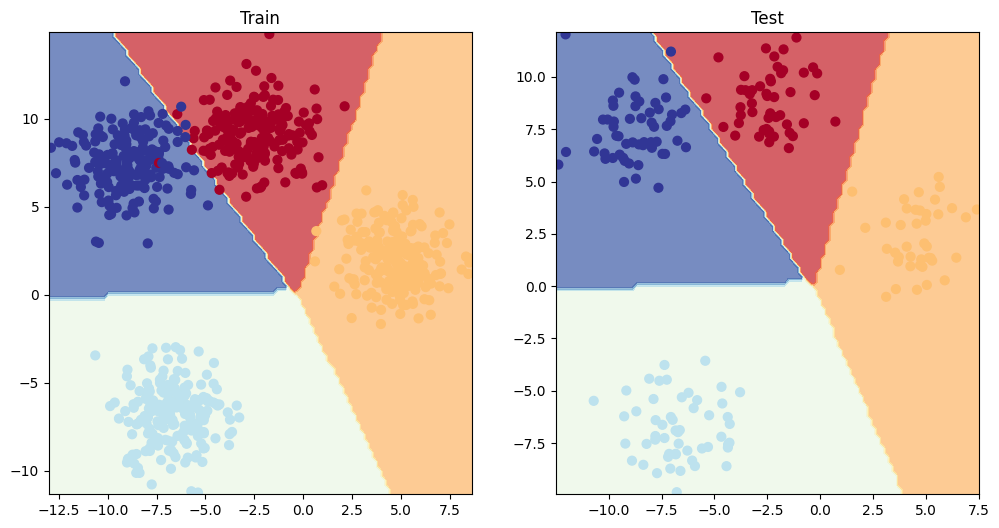

In [255]:
# 可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

## 9. 更多分类指标……（用于评估我们的分类模型）

* Accuracy - out of 100 samples, how many does our model get right?
  
* Precision
  
* Recall 
  
* F1-score
  
* Confusion matrix
  
* Classification report

关于何时使用精确率/召回率，请参阅这篇文章 - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

如果您想访问更多 PyTorch 指标，请参阅 TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/